In [22]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)
from sklearn.linear_model import (LogisticRegression)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import (make_pipeline, Pipeline)
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [6]:
# Import the data

file = "hatespeech_text_label_vote_RESTRICTED_100K.csv"
tweets = []
labels = []

with open(file) as fi:
    data = csv.reader(fi, delimiter='\t')
    for row in data:
        tweets.append(row[0])
        labels.append(row[1])

In [10]:
# Each tweet has a label, so these lists should have the same length.

len(tweets) == len(labels)

True

In [16]:
# How many of each different type of tweets are there?

Counter(labels)

Counter({'spam': 14030, 'abusive': 27150, 'normal': 53851, 'hateful': 4965})

<BarContainer object of 4 artists>

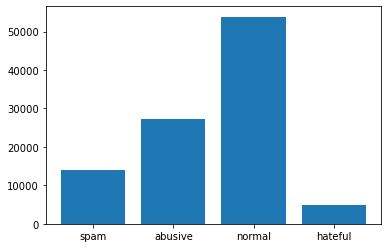

In [17]:
# Bonus point if you can make a visual

plt.bar(Counter(labels).keys(), Counter(labels).values())

In [27]:
# Split data into a training set and a test set

tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

In [28]:
# Create two vectorizers

countvectorizer = CountVectorizer(stop_words="english")
X_train = countvectorizer.fit_transform(tweets_train)
X_test = countvectorizer.transform(tweets_test)

Tfidfvectorizer = TfidfVectorizer(stop_words="english")
X_train = Tfidfvectorizer.fit_transform(tweets_train)
X_test = Tfidfvectorizer.transform(tweets_test)

In [34]:
# Train the classifiers

# Start with Bayes

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("    \tPrecision\tRecall")
for label in set(y_pred):
    pr = metrics.precision_score(y_test, y_pred, average='micro')
    re = metrics.recall_score(y_test,y_pred, average='micro')
    print(f"{label}:\t{pr:0.2f}\t\t{re:0.2f}")

    	Precision	Recall
normal:	0.72		0.72
spam:	0.72		0.72
hateful:	0.72		0.72
abusive:	0.72		0.72
